# Hausaufgabe X
> *Abgabe bis 02.12.2022 um 23:59*

### Aufgabe 1 *(55 Punkte)*

#### a) Fouriertransformation darstellen *(5 Punkte)*
Verändert den Code aus der Tutoriumsaufgabe (zu finden in ``Tutorium5 Mitschrift.ipynb``) so, dass das Signal im Frequenzbereich dargestellt wird und im Plot nur noch positive Frquenzen dargestellt werden, d.h. dass das Spektrum nicht mehr gespiegelt wird. Achtet auf die korrekte Achsenbeschriftung.

In [156]:
# Todo

# Tipp: Kopiert den relevanten Teil des Codes aus der Vorlage und fügt ihn hier ein.
#       Dann könnt ihr ihn so anpassen, dass die Frequenzspiegelung entfernt wird.
#       Lasst alle Teile weg, die nur für das Signal im Zeitbereich gebraucht werden.

#### b) Rücktransformation *(50 Punkte)*
Transformiert mithilfe der inversen Fouriertransformation ein gegebenes Signal zurück in den Zeitbereich. Geht dabei wie folgt vor:
1. Benutzt die vorgegebene Funktion ``getGeheimnisData`` um das zu transformierende Signal aus der Datei ``geheimnis.xyz`` auszulesen. Das Ergebnis ist das Signal im Frequenzbereich.
2. Transformiert das eingelesene Signal zurück in den Zeitbereich mit der Funktion ``ifft`` aus dem Paket ``scipy.fft``. Dieses Signal beinhaltet komplexe Werte, benutzt für die weiteren Aufgaben nur den Realteil.
3. Speichert das zurücktransformierte Signal in einer Audiodatei ``geheimnis.wav``. Vergesst nicht die Signalwerte auf $[-1, 1]$ zu normieren. Probiert verschiedene Abtastraten aus, um die Abtastrate des originalen Signals zu finden.
4. Plottet anschließend das transformierte Signal. Vergesst dabei nicht die Beschriftung des Plots mit Titel, x-Achse und y-Achse.

In [157]:
# Nötige Imports
import numpy as np
from scipy.io import wavfile
from scipy.fft import fft, fftfreq, ifft
import matplotlib.pyplot as plt
import pickle

In [158]:
# Diese Funktion könnt ihr dann benutzen um die xyz-Datei zu laden
def getGeheimnisData():
   return pickle.load(open("geheimnis.xyz","rb"))

In [159]:
# TODO  2. Signal rücktransformieren

werte = ifft(getGeheimnisData()).real
werte_n = werte / np.max(np.absolute(werte))
#werte = werte+min(werte)
#werte -= max(werte/2)
#werte /= max(werte)


In [160]:
# TODO 3. Speichern
wavfile.write("Geheimnis.wav",44100,werte_n)

# Tipp: Überlegt, welche Frequenz üblicherweise für Tonaufnahmen benutzt wird:
#       Um zu überprüfen, ob es geklappt hat, könnt ihr die Datei einfach anhören und schauen ob sie funktioniert.
#
#       !!!
#        Wenn es nicht funktioniert, benutzt einen anderen Player (z.B. VLC Media Player).
#        Manche Player (z.B. von Windows) können die entstehende .wav-Datei nicht öffnen.
#       !!! 

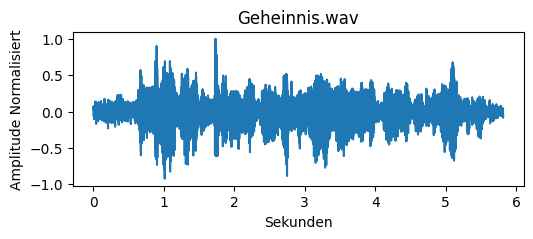

In [161]:
# TODO 4. Plotten
duration = len(werte_n)/44100
#print(duration)
plt.figure(figsize=(duration,2))
plt.plot(np.linspace(0, duration, len(werte_n)),werte_n)
plt.title("Geheinnis.wav")
plt.xlabel("Sekunden")
plt.ylabel("Amplitude Normalisiert")
plt.show()

# Tipp: Für die Zeitachse müsst ihr herausfinden, wie lang die Datei eigentlich genau ist (siehe Tutorium)

### Aufgabe 2 *(40 Punkte)*

Schreibt eine Python Funktion, die die Dateigröße einer ``.wav``-Datei berechnet. Als Parameter sollen der Funktion beim Funktionsaufruf folgende Werte übergeben werden:
- Auflösung (Bittiefe in Bits)
- Abtastrate (in Hz)
- Anzahl der Kanäle
- Dauer des Signals (in Sekunden)

Die Funktion gibt den Wert in **Mebibyte** auf **drei Nachkommastellen** gerundet zurück.

Strukturiert euer Programm als Dialogsystem, indem ihr die Funktionen ``input()`` und ``print()`` verwendet um die oben genannten Parameter abzufragen. Beachtet dabei folgendes:
- Das Dialogsystem soll immer wieder von vorne beginnen, nachdem eine Rechnung durchgeführt und ausgegeben wurde.
- Nach jedem Durchlauf des Dialogsystems soll der Nutzer gefragt werden, ob es der Programm beenden möchte (abhängig von der Antwort geht es entweder von vorne los, oder das Programm endet).
- Bei der Ausgabe eines Ergebnisses sollen die Parameter mit ausgegeben werden.

Die Ausgabe des fertigen Programmes könnte beispielshaft so aussehen:
```
Anzahl der Kanäle:  2
Länge in Sekunden:  10
Abtastrate in Hz:   41000
Bits pro Sample:    16
Die Datei wird 1.564 MebiBytes groß sein.
```

In [170]:
def calculate_file_size(resolution, sample_rate, channel_count, length):
   # Todo: Dateigröße berechnen
   return (channel_count*length*sample_rate*resolution)/8/(2**20)
   return (channel_count*length*sample_rate*resolution)/(8.389*10**6)

print(calculate_file_size(16,41000,2,10))

1.56402587890625


In [163]:
# TODO: Dialogsystem implementieren


### Aufgabe 3 *(5 Punkte)*

Weshalb ist eine Audio-Datei tatsächlich immer etwas größer als sie von den betrachteten Parametern her sein müsste? Schreibt eure Antwort in das Feld unterhalb.

Antwort: